Hello, the flow of the work for this paper will be as follows:
1. read the data
2. scale the data
3. visualise the data
4. split the data
5. get feature importance (permutation)
6. visualize the best N imported features
7. try from (1, 5, 10, 50) best features
    10, 20, 30, 40, 50 Freq. Random
8. the split should be (70, 30)
9. try up to 6 different classification models (RF, XGB, SVM, LR, KNNs, MD)
10. get the error bars and make comparisons

In [1]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
from matplotlib.pyplot import show # This displays graphs once they have been created
import numpy as np
import matplotlib.pyplot as plt
from source.roc import draw_roc 
from scipy.stats import skew


### 1. read the data

In [2]:
df = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

In [3]:
df.head(5)

,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,GS-ch-bruise1h-11a,B,1h,S1,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879


In [4]:
df.shape

(503, 2078)

### change the col names

In [5]:
wavenumbers = np.float_(df.columns[4:])
type(wavenumbers[0])
wavelengths = (1/wavenumbers)*10**7

print(str(wavenumbers[0])+", "+ str(wavelengths[0]))

11995.49, 833.6466455309454


In [6]:
df.columns.values[4:] = np.round(wavelengths, 3)
df.head(4)

,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607


### labels

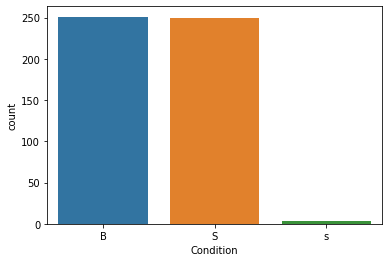

In [7]:
ax = sns.countplot(x="Condition",data=df)


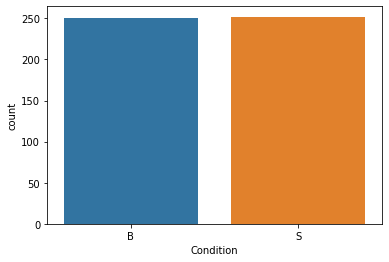

In [8]:
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df)


#### getting x, and y

In [9]:
df_input = df.iloc[:, 4: ]
df_input

,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,-0.113074,-0.113266,-0.114108,-0.114498,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,-0.159698,-0.159639,-0.160184,-0.160504,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,-0.137664,-0.138295,-0.139098,-0.139391,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,-0.142162,-0.142754,-0.143336,-0.143301,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,-0.166405,-0.166787,-0.167322,-0.167319,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.005843,-0.005746,-0.005965,-0.006040,-0.005732,-0.005905,-0.006496,-0.006305,-0.005184,-0.004249,...,0.823532,0.825095,0.831351,0.830832,0.824308,0.817157,0.814575,0.815848,0.817096,0.823652
499,-0.010555,-0.009949,-0.010038,-0.010154,-0.010212,-0.010717,-0.010729,-0.009878,-0.009303,-0.009316,...,0.647229,0.642954,0.642807,0.646312,0.650215,0.651266,0.648941,0.648903,0.655380,0.662244
500,-0.054230,-0.054836,-0.055471,-0.055616,-0.055853,-0.056578,-0.056854,-0.055983,-0.054825,-0.054404,...,0.403613,0.404402,0.408775,0.410042,0.406809,0.405787,0.406463,0.405325,0.406469,0.410188
501,0.052804,0.052833,0.053037,0.053045,0.052818,0.052379,0.052130,0.052272,0.052694,0.053489,...,1.357465,1.369164,1.395378,1.412128,1.423115,1.429553,1.404126,1.366339,1.349845,1.325851


In [10]:
y = df['Condition']


### 2.scale the data

In [11]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# input_scaled = scaler.fit_transform(df_input)

# df_input_scaled = pd.DataFrame(input_scaled, columns = df_input.columns)
# # df_input_scaled['class'] = df['Condition']

# df_input_scaled

### 3. visualize the data

In [44]:
n = 50
target = np.array(df['Condition'])
rand  = np.random.randint(len(target), size= n)
rand

array([ 26,  66, 469, 146, 313, 416, 396, 442,  79,  83, 203, 492,  24,
       192,  98, 323, 439, 274, 240, 400, 299, 245, 247, 466, 494,  12,
       144,  60, 237, 219, 344, 164, 230,  43, 118, 219,  83, 150, 218,
       276, 351, 236,  26, 121, 415, 364, 100,  95, 380,  21])

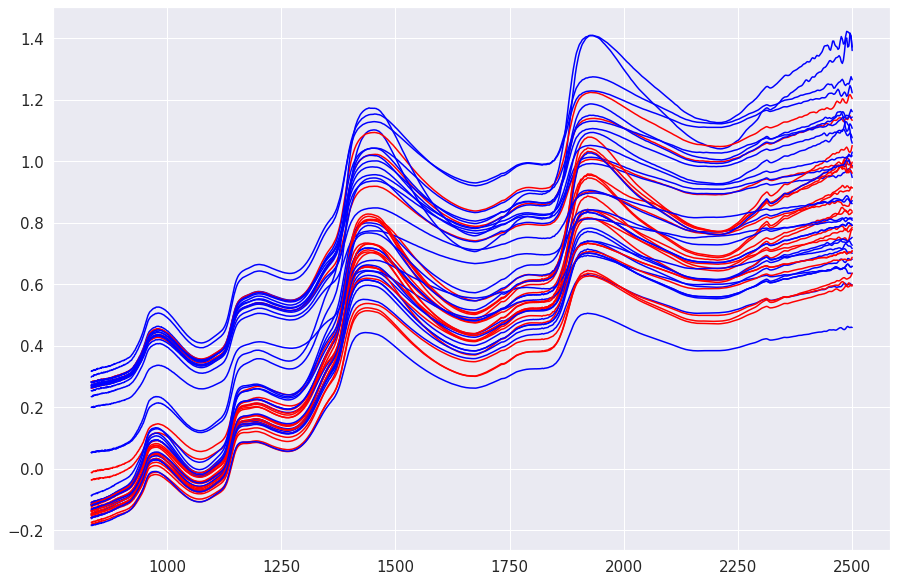

In [45]:
for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input.iloc[i]).flatten()
    if target[i] == 'S':
        plt.plot(np.array(df_input.columns), lineSpec, color = 'red')
    if target[i] == 'B':
        plt.plot(np.array(df_input.columns), lineSpec, color = 'blue')
    # plt.ylim(-1, 2)
plt.show()

# for t in range (n):
#     i = rand[t]
#     lineSpec =  np.array(df_input.iloc[i]).flatten()
#     if target[i] == 'S':
#         plt.scatter(t, np.mean(lineSpec), color = 'red')
#     if target[i] == 'B':
#         plt.scatter(t, np.mean(lineSpec), color = 'blue')
#     # plt.ylim(-1, 2)
# plt.show()

# for t in range (n):
#     i = rand[t]
#     lineSpec =  np.array(df_input.iloc[i]).flatten()
#     if target[i] == 'S':
#         plt.scatter(t, np.median(lineSpec), color = 'red')
#     if target[i] == 'B':
#         plt.scatter(t, np.median(lineSpec), color = 'blue')
#     # plt.ylim(-1, 2)
# plt.show()

# for t in range (n):
#     i = rand[t]
#     lineSpec =  np.array(df_input_scaled.iloc[i]).flatten()
#     if target[i] == 'S':
#         plt.scatter(np.median(lineSpec), skew(lineSpec), color = 'red')
#     if target[i] == 'B':
#         plt.scatter(np.median(lineSpec), skew(lineSpec), color = 'blue')
#     # plt.ylim(-1, 2)
# plt.show()

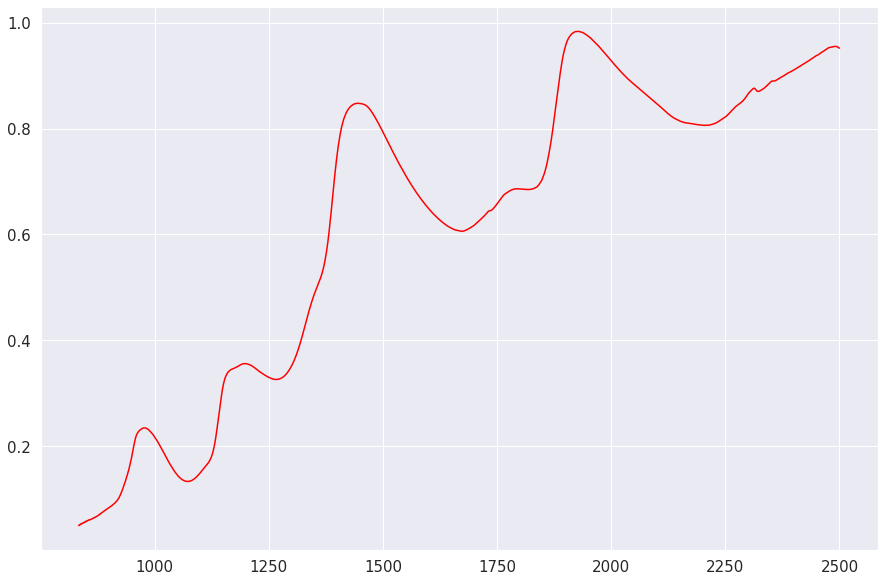

In [46]:
plt.plot(df_input.columns, df_input.values.mean(0), color = 'red')

In [47]:
# for t in range (n):
#     i = rand[t]
#     lineSpec =  np.array(df_input.iloc[i]).flatten()
#     # if target[i] == 'S':
#     #     plt.plot(np.array(df_input.columns), lineSpec, color = 'red')
#     if target[i] == 'B':
#         plt.plot(np.array(df_input.columns), lineSpec, color = 'blue')
#     plt.ylim(-1, 2)
# plt.show()
# first 2, and local min and max

### 4. split the data

In [48]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input, y, test_size = 0.3, random_state=3, stratify=y) # train and valid sets

In [49]:
print(Xtrain.shape)
print(Xtest.shape)

(352, 2074)
(151, 2074)


### 5- permutation_importance

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from random import *
import random
from matplotlib import pyplot

attrNames = np.array(df_input.columns)
attrNames

array([833.647, 833.915, 834.183, ..., 2495.323, 2497.727, 2500.136],
      dtype=object)

In [51]:
featureImport = []

In [53]:
# for i in range (1000): # take the average of 3 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
#     print("itr: " + str(i))
    
#     RandomStateValid = randrange(50)
#     ranodmSplitValid = random.uniform(0.2, 0.5)
#     XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( np.array(Xtrain), np.array(Ytrain), test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
#     print("Train shape: "+str(XtrainPer.shape))
#     print("Valid shape: "+str(XvalidPer.shape))
#     print()
   
#     # train
#     model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs = -1)
#     model.fit(XtrainPer, YtrainPer)
    
#     results = permutation_importance(model, XvalidPer, YvalidPer, scoring='precision_macro', n_repeats = 10, n_jobs = -1)
#     importance = results.importances_mean
#     # print(importance)

#     featureImport.append(importance)

In [ ]:
print(np.array(featureImport).shape)

arrimp = np.array(featureImport).mean(0)
print(arrimp.shape)
print(arrimp)
print()
sorted_idx = arrimp.argsort()

print("sorted")
print((arrimp[sorted_idx]))
# print(attrNames[sorted_idx])

#### store the index of the most N important features

In [30]:
# featOrdered = attrNames[sorted_idx][-400:]
# %store featOrdered
# %store sorted_idx
# %store arrimp




Stored 'featOrdered' (ndarray)
Stored 'sorted_idx' (ndarray)
Stored 'arrimp' (ndarray)


In [54]:
%store -r featOrdered
%store -r sorted_idx
%store -r arrimp

---

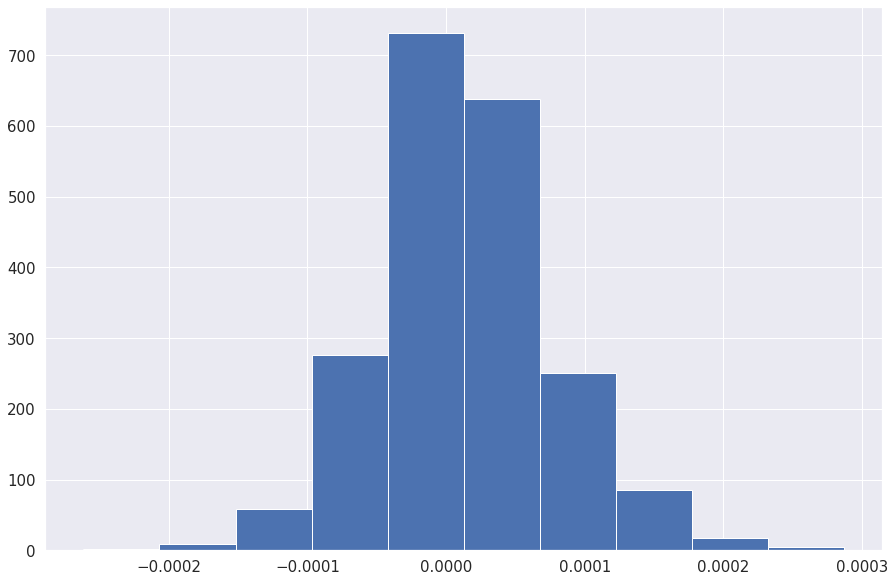

In [55]:
plt.hist(arrimp[sorted_idx])
plt.show()

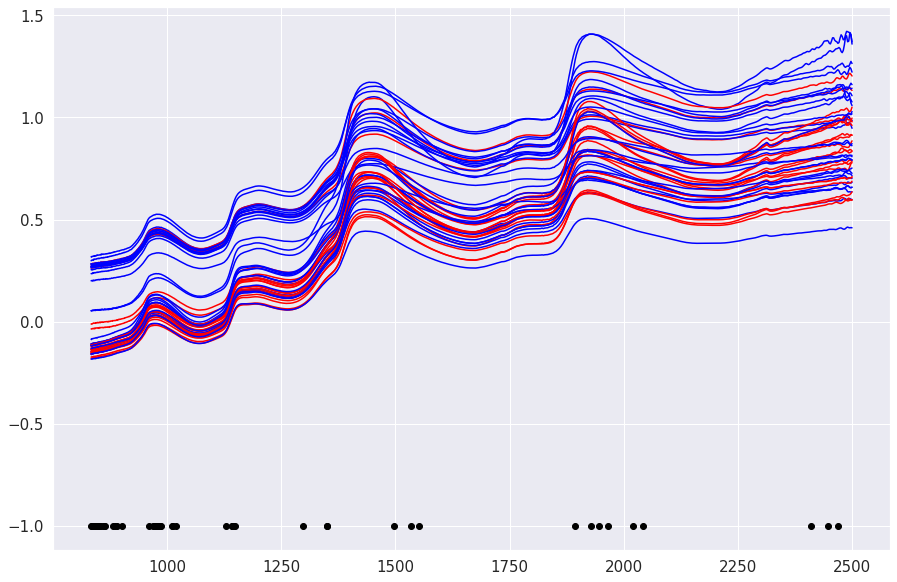

In [67]:
n = 50

pyplot.rcParams["figure.figsize"] = (15,10)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['axes.labelsize'] = 15
pyplot.rcParams['axes.titlesize'] = 15

for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input.iloc[i]).flatten()
    if target[i] == 'S':
        pyplot.plot(np.array(df_input.columns), lineSpec, color = 'red')
    if target[i] == 'B':
        pyplot.plot(np.array(df_input.columns), lineSpec, color = 'blue')
    # plt.ylim(-1, 2)
pyplot.scatter(attrNames[sorted_idx][-n:], arrimp[sorted_idx][-n:]-1, color = 'black')

# print(attrNames[sorted_idx][-n:])
# print(arrimp[sorted_idx][-n:])

# pyplot.scatter(attrNames[sorted_idx][:n], arrimp[sorted_idx][:n]-1, color= 'brown')

# pyplot.barh(np.arange(0, n), arrimp[sorted_idx][-n:])

# # pyplot.barh(range(10), arrimp[10:])

pyplot.show()
# peaks are important.

### 6- visualise best 10 features

In [41]:
df_perImp = pd.DataFrame()
df_perImp = df_input[attrNames[sorted_idx][-10:]]
df_perImp['Condition'] = df['Condition'].values
print(df_perImp)

      859.914   979.464  2043.058  1145.159   863.638   1143.14   852.562  \
0   -0.101496  0.109157  0.789421  0.181849 -0.099686  0.166903 -0.104999   
1   -0.148115  0.034984  0.427745  0.092643 -0.146124  0.080073 -0.152089   
2   -0.126781  0.054915  0.766200  0.119490 -0.124686  0.105475 -0.130579   
3   -0.131911  0.048916  0.648261  0.112182 -0.130070  0.098551 -0.135274   
4   -0.156319  0.004543  0.491582  0.061623 -0.154359  0.050044 -0.159925   
..        ...       ...       ...       ...       ...       ...       ...   
498  0.002895  0.160976  0.810898  0.212546  0.004118  0.200458  0.002740   
499 -0.004140  0.147708  0.638674  0.187898 -0.000974  0.177477 -0.003687   
500 -0.046775  0.106743  0.415406  0.142363 -0.045667  0.132092 -0.046813   
501  0.061401  0.219532  1.211343  0.272327  0.064053  0.260124  0.060889   
502  0.049249  0.199109  1.148079  0.251730  0.051601  0.239645  0.050007   

      977.617   833.647     838.5 Condition  
0    0.109726 -0.113748 -0.10

/tmp/ipykernel_1122372/3393190028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perImp['Condition'] = df['Condition'].values


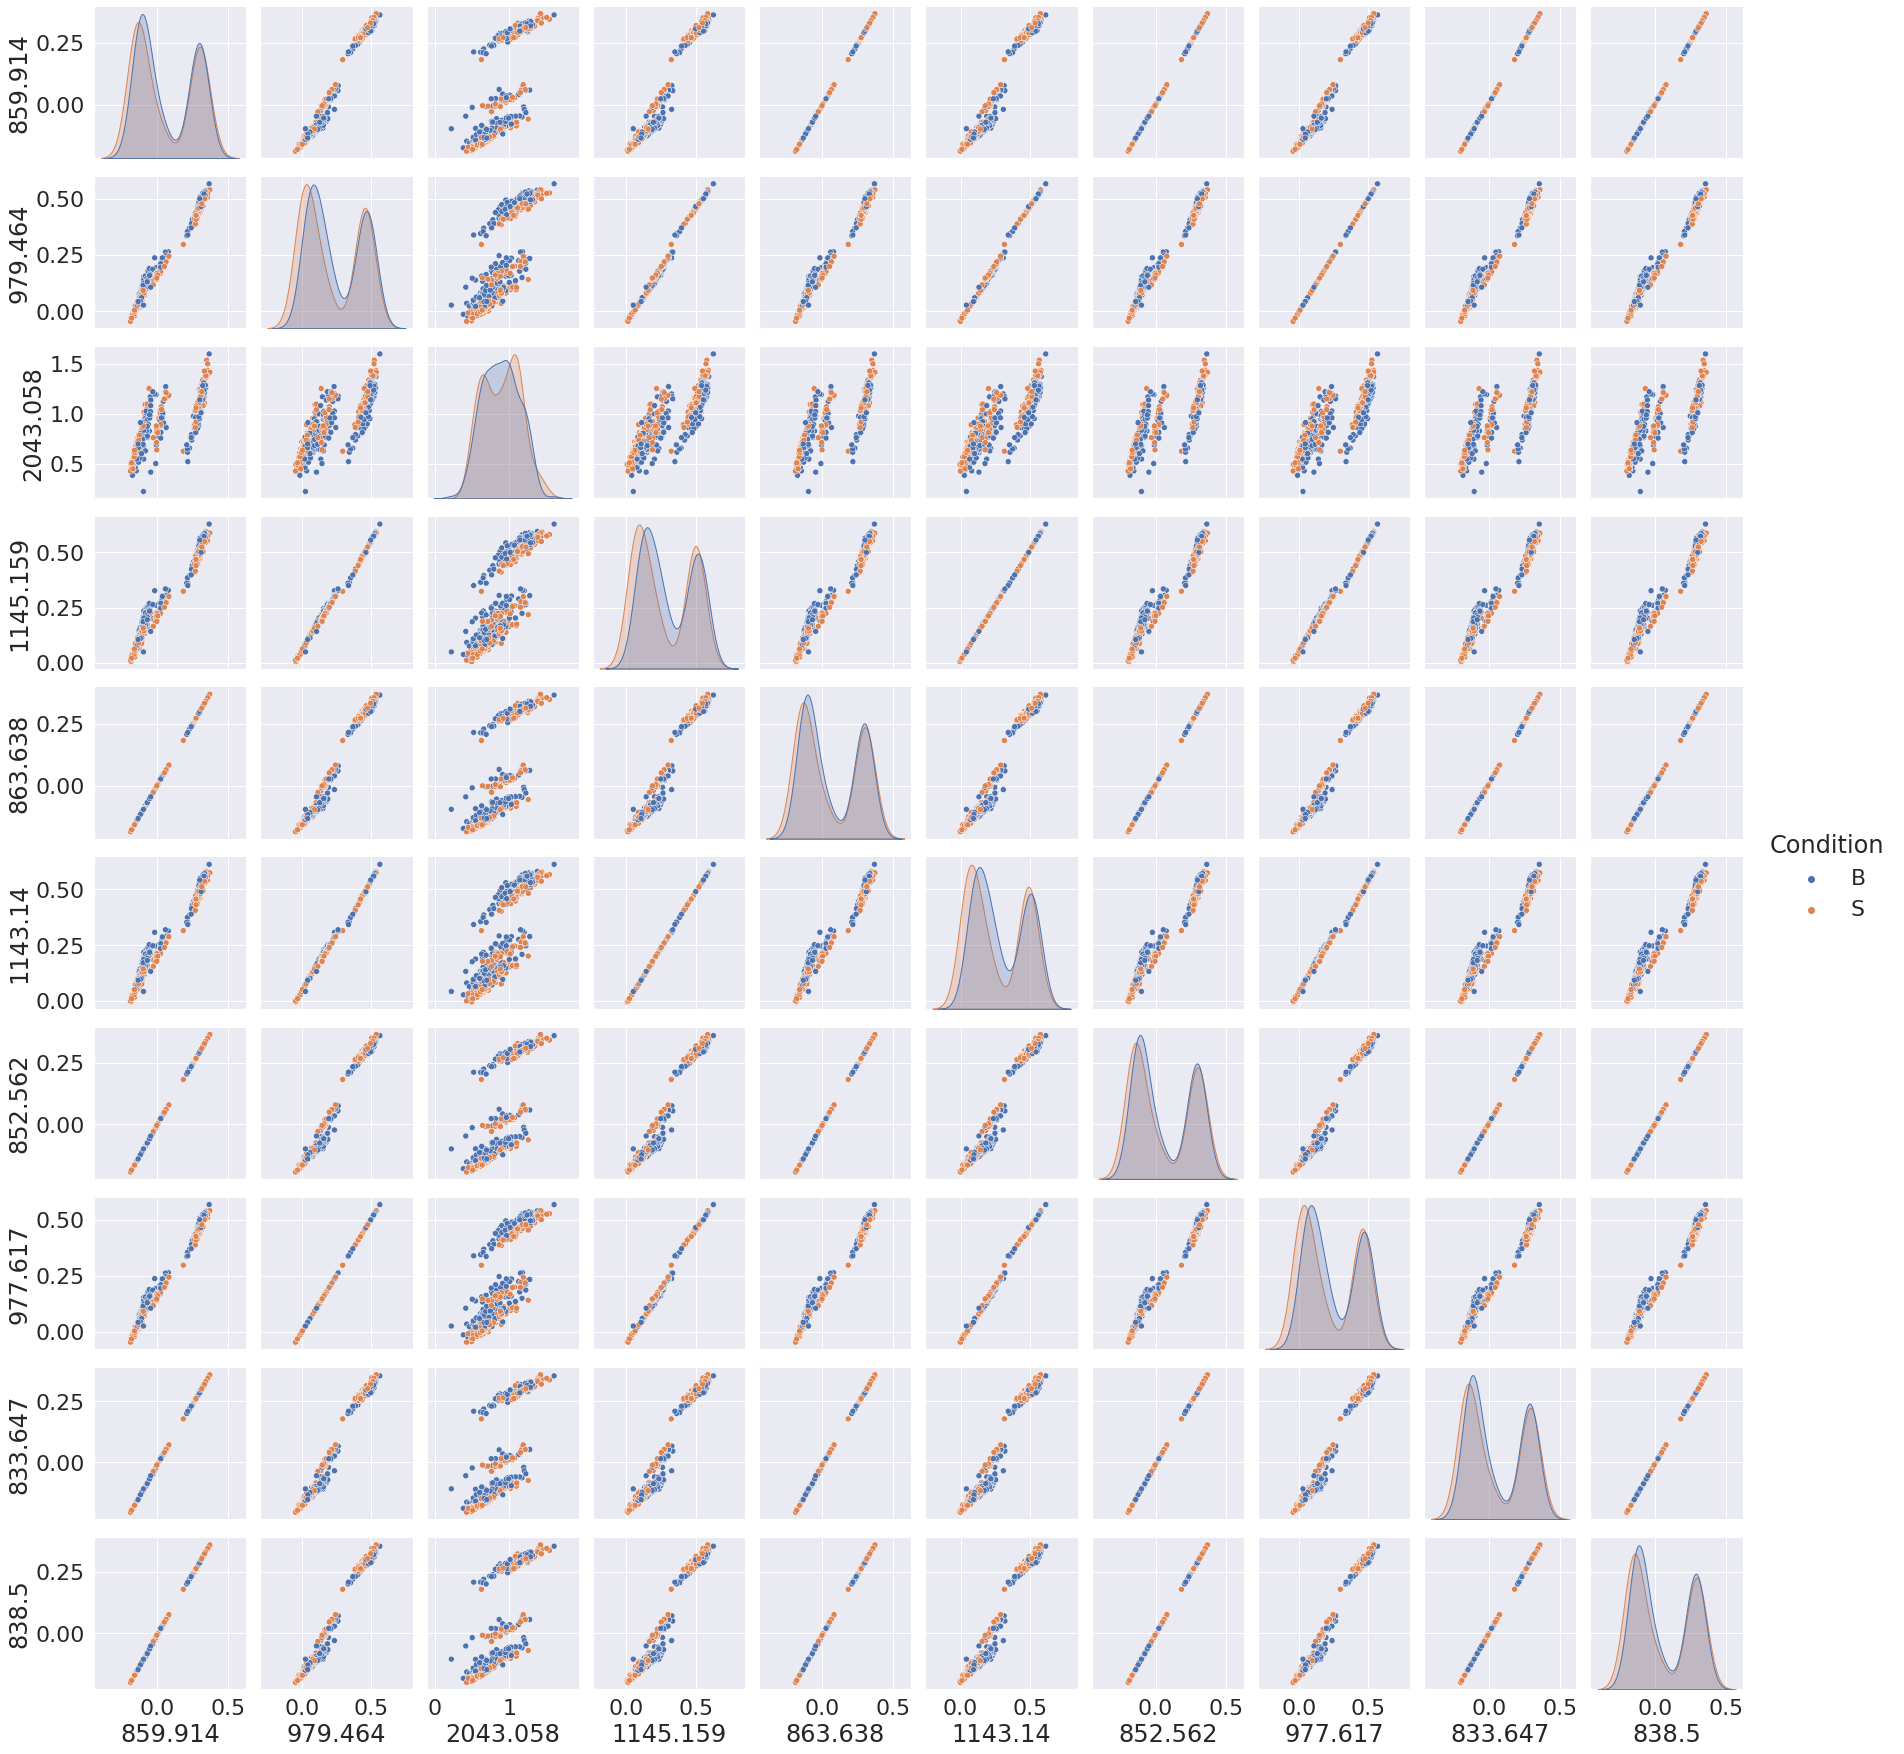

In [42]:
sns.set(font_scale=2)
sns.pairplot(df_perImp, hue="Condition")

In [27]:
print(1)

1
